<a href="https://colab.research.google.com/github/sundarbee/DataEngineering/blob/master/Sundar_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 DS & Stats Examination — Application Oriented
**Time:** 60 minutes  **Total:** 6 Questions (equal marks)

**Rules**
- Write clean, commented code below each question.
- Allowed: Python, NumPy, Pandas, Matplotlib, SciPy (if needed).
- Do not rename variables provided in examples.
- Print exactly what is asked in **Expected Output**.


## Q1) Banking — ATM Transactions Tracker (Lists)
**Scenario.** Track ATM transactions and running balance.

**Constraints**
- `transactions`: positive = deposit, negative = withdrawal.
- Print: `Balance after X = Y` after each transaction.
- At the end, print `Total deposits = ...` and `Total withdrawals = ...` (withdrawals sum will be negative).

**Example Input**
```python
transactions = [500, -200, -100, 1000, -50]
```
**Expected Output**
```
Balance after 500 = 500
Balance after -200 = 300
Balance after -100 = 200
Balance after 1000 = 1200
Balance after -50 = 1150
Total deposits = 1500
Total withdrawals = -350
```

In [12]:
from re import I
balance = 0
total_deposit=0
total_withdrawal=0
transactions = [500, -200, -100, 1000, -50]
for i in transactions:
  balance = balance+i
  print(f"Balance after {i},{balance}")
  if i > 0:
    total_deposit=total_deposit + i
  else:
    total_withdrawal = total_withdrawal + i

print('total_deposit',total_deposit)
print('total_withdrawal',total_withdrawal)



Balance after 500,500
Balance after -200,300
Balance after -100,200
Balance after 1000,1200
Balance after -50,1150
total_deposit 1500
total_withdrawal -350


## Q2) HR/Payroll — Employees & Interns
**Scenario.** A company maintains basic employee details and needs a quick **eligibility check for performance bonus**.

**Constraints**
- Base class `Employee(name, age, salary)`
- Subclass `Intern(name, age, stipend)` (store stipend in `salary` for reuse)
- Method `eligible_for_bonus(min_salary, min_years)` returns `True` if `salary ≥ min_salary` **and** `years_of_service ≥ min_years`.
- For this exam, assume:
  - Alice: age=28, salary=50000, years_of_service=3
  - Bob:   age=26, stipend=32000 (as salary), years_of_service=0
  - `min_salary = 40000`, `min_years = 1`
- Print one line per person: `name age salary years_of_service eligible` (keep two spaces before Bob to match example).

**Expected Output**
```
Alice 28 50000.0 10.0 True
Bob  26 32000.0 0.0  False
```

In [20]:
class Employee:
    def __init__(self, name, age, salary, years_of_service):
        self.name = name
        self.age = age
        self.salary = float(salary)
        self.years_of_service = float(years_of_service)

    def eligible_for_bonus(self, min_salary, min_years):
        return self.salary >= min_salary and self.years_of_service >= min_years

class Intern(Employee):
    def __init__(self, name, age, stipend):
        super().__init__(name, age, stipend, 0)
# Data and constraints
min_salary = 40000
min_years = 1

# Create objects
alice = Employee("Alice", 28, 50000, 10)
bob = Intern("Bob", 26, 32000)

print(f"{alice.name} {alice.age} {alice.salary} {alice.years_of_service} {alice.eligible_for_bonus(min_salary, min_years)}")
print(f"{bob.name}  {bob.age} {bob.salary} {bob.years_of_service}  {bob.eligible_for_bonus(min_salary, min_years)}")



Alice 28 50000.0 10.0 True
Bob  26 32000.0 0.0  False


## Q3) Retail Analytics — Daily Footfall (Visualization)
**Scenario.** A store wants to visualize daily **visitor counts**.

**Constraints**
- Plot a chart.
- Title: `Daily Footfall` X: `Day` Y: `Visitors`
- Annotate the **highest** day with its value.

**Data**
```python
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
visitors = [120, 135, 210, 190, 160, 90, 70]
```
**Expected Output (Description)**
```
A chart titled 'Daily Footfall' with 'Day' 'Visitors'.
The highest day is annotated with its exact value.
```

210
2
Wed


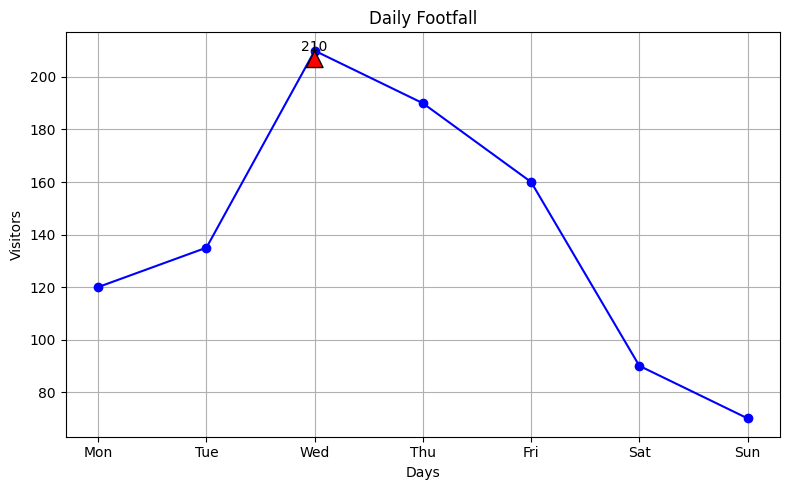

In [31]:
import matplotlib.pyplot as plt

days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
visitors = [120, 135, 210, 190, 160, 90, 70]

plt.figure(figsize=(8,5))
plt.plot(days,visitors,marker='o',linestyle='-',color='blue')

plt.title('Daily Footfall')
plt.xlabel('Days')
plt.ylabel('Visitors')

max_visitors = max(visitors)
print(max_visitors)
max_index =  visitors.index(max_visitors)
print(max_index)
max_day = days[max_index]
print(max_day)

plt.annotate(
    f'{max_visitors}',
    xy = (max_day,max_visitors),
    ha = 'center',
    arrowprops=dict(facecolor='red',shrink=0.05)
)

plt.grid(True)
plt.tight_layout()
plt.show()

## Q4) Manufacturing QC — Summary Stats & IQR Outliers (Pandas)
**Scenario.** A factory measures the **diameter (mm)** of sample parts each hour; an occasional faulty reading is present.

**Constraints**
- Implement functions: `summarize(series)` and `iqr_outliers(series)`.
- `summarize` returns a dict with: mean, median, mode (smallest if tie), variance, std, q1, q3, iqr. Use **sample** variance/std (`ddof=1`).
- `iqr_outliers` returns a **sorted list** of outlier values using Q1−1.5×IQR and Q3+1.5×IQR.

**Data**
```python
import pandas as pd
diameter = pd.Series([4, 5, 6, 7, 5, 6, 12])
```
**Expected Output**
```
Summary:
{'mean': 5.75, 'median': 5.5, 'mode': 5.0, 'variance': 5.3666..., 'std': 2.3166..., 'q1': 4.5, 'q3': 7.0, 'iqr': 2.5}
IQR outliers: [12.0]
```

In [39]:
import pandas as pd
import numpy as np
import scipy as stats

def summarize(values):
  mean = values.mean()
  median = values.median()
  mode = values.mode().iloc[0]
  variance = values.var(ddof=1)
  std = values.std(ddof=1)
  q1 = values.quantile(0.25)
  q3 = values.quantile(0.75)
  iqr = q3 - q1

  return {
      'mean': mean,
      'median': median,
      'mode': mode,
      'variance': variance,
      'std': std,
      'q1': q1,
      'q3': q3,
      'iqr': iqr
  }

def iqr_outliers(values):
  q1 = values.quantile(0.25)
  q3 = values.quantile(0.75)

  iqr = q3-q1
  lower_bound = q1-1.5 * iqr
  upper_bound = q3+1.5 * iqr

  outliers = values[(values < lower_bound) | (values > upper_bound)].sort_values().tolist()
  return outliers

diameter = pd.Series([4, 5, 6, 7, 5, 6, 12])
summary = summarize(diameter)
print("Summary:")
print(summary)

# Get IQR outliers
outliers = iqr_outliers(diameter)
print("IQR outliers:", outliers)



Summary:
{'mean': np.float64(6.428571428571429), 'median': 6.0, 'mode': np.int64(5), 'variance': 6.9523809523809526, 'std': 2.63673679998231, 'q1': np.float64(5.0), 'q3': np.float64(6.5), 'iqr': np.float64(1.5)}
IQR outliers: [12]


## Q5) Marketing Analytics — Z-Scores, Correlation & Outlier Rows (Pandas)
**Scenario.** A small campaign report includes **leads**, **ad spend**, and **conversions**; one day is an outlier.

**Constraints**
- For each numeric column, add z-score (`*_z`) using population std (`ddof=0`); if std=0, set z=0.
- Print the correlation matrix for numeric columns (rounded to 4 decimals).
- Using IQR per numeric column, print sorted unique **row indices** outlying in **any** numeric column.

**Data**
```python
import pandas as pd
df = pd.DataFrame({
    'lead':  [10, 12, 13, 60, 14, 12],
    'spend': [100,120,140,600,150,130],
    'conv':  [  1,  1,  2,  9,   2,  1]
})
```
**Expected Output**
```
Added z-score columns: ['lead_z', 'spend_z', 'conv_z']

Correlation (numeric only):
           lead   spend    conv
lead    1.0000   0.9824   0.9782
spend   0.9824   1.0000   0.9930
conv    0.9782   0.9930   1.0000

Outlier row indices (any numeric column): [3]
```

In [50]:
import pandas as pd
import numpy as np

# Data
df = pd.DataFrame({
    'lead':  [10, 12, 13, 60, 14, 12],
    'spend': [100,120,140,600,150,130],
    'conv':  [  1,  1,  2,  9,   2,  1]
})

for col in df.columns:
    std = df[col].std(ddof=0)
    if std == 0:
        df[col + '_z'] = 0
    else:
        df[col + '_z'] = (df[col] - df[col].mean()) / std


print("Added z-score columns:", [col + '_z' for col in df.columns])


cor = df[df.columns].corr()
print("\n Correlation (numeric):")
print(cor.round(4))

outlier_indices = set()

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices.update(outliers)


print("\nOutlier row indices (any numeric column):", sorted(outlier_indices))



Added z-score columns: ['lead_z', 'spend_z', 'conv_z', 'lead_z_z', 'spend_z_z', 'conv_z_z']

 Correlation (numeric):
           lead   spend   conv  lead_z  spend_z  conv_z
lead     1.0000  0.9997  0.994  1.0000   0.9997   0.994
spend    0.9997  1.0000  0.995  0.9997   1.0000   0.995
conv     0.9940  0.9950  1.000  0.9940   0.9950   1.000
lead_z   1.0000  0.9997  0.994  1.0000   0.9997   0.994
spend_z  0.9997  1.0000  0.995  0.9997   1.0000   0.995
conv_z   0.9940  0.9950  1.000  0.9940   0.9950   1.000

Outlier row indices (any numeric column): [3]


## Q6) Support Desk — SLA Claim (Decision-Only Hypothesis)
**Scenario.** The support team claims **average first-response time = 30 minutes**.

**Constraints**
- Use the sample; treat as **two-sided** at 5% significance.
- Print: sample mean, a suitable test statistic, p-value, and a plain decision (`Reject claim` or `Fail to reject claim`).

**Data**
```python
import numpy as np
frt = np.array([32, 27, 29, 31, 40, 22, 28, 27])
```

In [56]:
import numpy as np
from scipy import stats

# Data
frt = np.array([32, 27, 29, 31, 40, 22, 28, 27])
claimed_mean = 30

sample_mean = frt.mean()
# print(sample_mean)

t_stat, p_value = stats.ttest_1samp(frt, claimed_mean)
# print(t_stat)
# print(p_value)


alpha = 0.05
decision = "Reject claim" if p_value < alpha else "Fail to reject claim"

print("Sample mean:", round(sample_mean, 4))
print("t-statistic:", round(t_stat, 4))
print("p-value:", round(p_value, 4))
print("Decision:", decision)

Sample mean: 29.5
t-statistic: -0.2714
p-value: 0.7939
Decision: Fail to reject claim
